In [33]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [34]:
df_train = pd.read_csv("../datasets/Titanic/train.csv", index_col='PassengerId')

In [35]:
df_train.head()
list(df_train)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Get some data insights

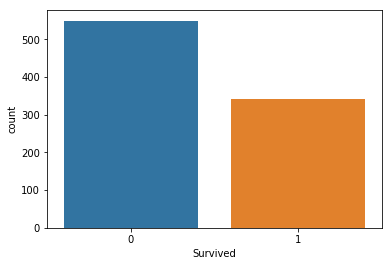

In [36]:
sns.countplot('Survived', data=df_train)

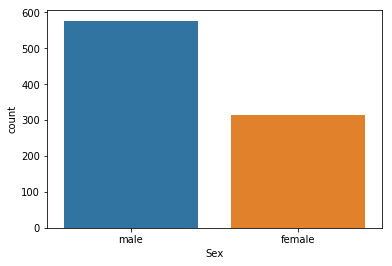

In [37]:
sns.countplot('Sex', data=df_train)

In [38]:
df_train['Sex'].count()

891

In [39]:
df_train.groupby('Sex').sum()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [40]:
mask = df_train['Sex'] == "male"
mask_f = df_train['Sex'] == "female"

print(df_train['Sex'][mask].count())
print(df_train['Sex'][mask_f].count())

577
314


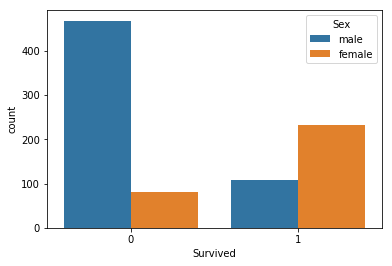

In [41]:
sns.countplot('Survived', hue='Sex', data=df_train)

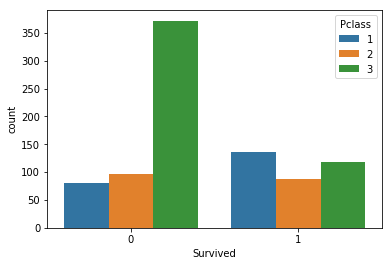

In [42]:
sns.countplot('Survived', hue='Pclass', data=df_train)

pandas.core.frame.DataFrame

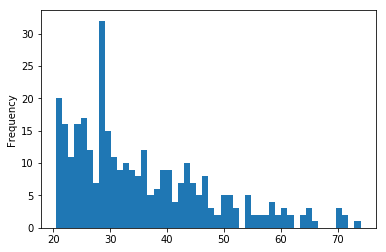

In [43]:
mask = df_train['Survived'] == 0
mask_age = df_train['Age'] > 20

df_train['Age'][mask][mask_age].plot.hist(bins=50)


## Define functions

In [44]:
def fill_age(df):
    df =  df_train["Age"].\fillna(df_train["Age"].median())
    return df


In [45]:
def fill_embarked(df):
    df = df_train["Embarked"].fillna('S')
    return df

In [46]:
def sex_category(df):
    df["Sex"] = np.where(df["Sex"] == "male", 1, 0) 
    
#     TODO:
#     df[df["Sex"]=="male"]=1 

    return df

In [47]:
def embarked_category(df):
    embarks = sorted(df['Embarked'].unique())
    # ['S', 'C', 'A']

    # Generate a mapping of Embarked string to a numbers (0,1,...)    
    embarks_map = dict(zip(embarks, range(0, len(embarks) + 1)))

    # Transform Embarked from a string to a number representation
    df['Embarked'] = df['Embarked'].map(embarks_map).astype(int)
    
    return df

## Clean the data

In [50]:
df_train = fill_age(df_train)
df_train = fill_embarked(df_train)
# df_train = sex_category(df_train)
# df_train = embarked_category(df_train)

KeyError: 'Age'

In [49]:
type(df_train)

pandas.core.series.Series